In [ ]:
#https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [2]:
df = pd.read_csv('Telco-Customer-Churn_revised.csv')
df

<IPython.core.display.Javascript object>

SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0                 0        1           0       1             0   
1                 0        0           0      34             1   
2                 0        0           0       2             1   
3                 0        0           0      45             0   
4                 0        0           0       2             1   
...             ...      ...         ...     ...           ...   
7027              0        1           1      24             1   
7028              0        1           1      72             1   
7029              0        1           1      11             0   
7030              1        1           0       4             1   
7031              0        0           0      66             1   

      PaperlessBilling  MonthlyCharges  TotalCharges  Churn  gender_Male  ...  \
0                    1           29.85         29.85      0            0  ...   
1                    0           56.95       1889.50      0            1  ...   
2                    1           53.85        108.15      1            1  ...   
3                    0           42.30       1840.75      0            1  ...   
4                    1           70.70        151.65      1            0  ...   
...                ...             ...           ...    ...          ...  ...   
7027                 1           84.80       1990.50      0            1  ...   
7028                 1          103.20       7362.90      0            0  ...   
7029                 1           29.60        346.45      0            0  ...   
7030                 1           74.40        306.60      1            1  ...   
7031                 1          105.65       6844.50      0            1  ...   

      TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
0                   0                                0                0   
1                   0                                0                0   
2                   0                                0                0   
3                   1                                0                0   
4                   0                                0                0   
...               ...                              ...              ...   
7027                1                                0                1   
7028                0                                0                1   
7029                0                                0                0   
7030                0                                0                0   
7031                1                                0                1   

      StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                       0                    0   
1                                       0                    0   
2                                       0                    0   
3                                       0                    0   
4                                       0                    0   
...                                   ...                  ...   
7027                                    0                    1   
7028                                    0                    1   
7029                                    0                    0   
7030                                    0                    0   
7031                                    0                    1   

      Contract_One year  Contract_Two year  \
0                     0                  0   
1                     1                  0   
2                     0                  0   
3                     1                  0   
4                     0                  0   
...                 ...                ...   
7027                  1                  0   
7028                  1                  0   
7029                  0                  0   
7030                  0                  0   
7031                  0                 

In [3]:
print("The dataframe has", df.shape[0], 'rows.')
print('The dataframe has', df.shape[1], 'columns.')

The dataframe has 7032 rows.
The dataframe has 31 columns.


### Visuals

In [5]:
import seaborn as sns

In [6]:
nochurn = df[df['Churn'] == 0 ]
churn = df[df['Churn'] == 1 ]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

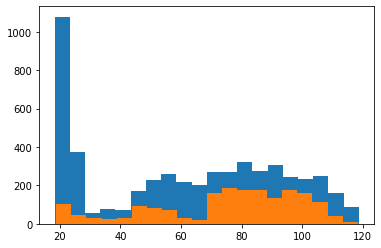

In [7]:
plt.hist(nochurn['MonthlyCharges'], 20 );
plt.hist(churn['MonthlyCharges'], 20);


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

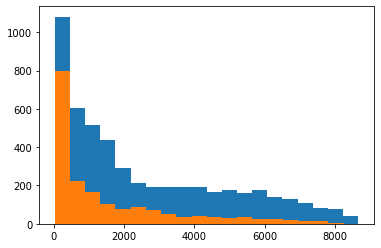

In [69]:
plt.hist(nochurn['TotalCharges'], 20,label = 'No' );
plt.hist(churn['TotalCharges'], 20, label = 'Churn');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

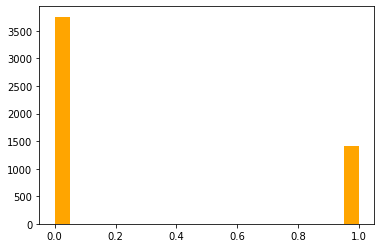

In [65]:
plt.hist(churn['StreamingMovies_No internet service'], 20, color = 'blue')
plt.hist(nochurn['StreamingMovies_No internet service'], 20, color = 'orange');

### EDA

### X-Value

In [7]:
df = pd.get_dummies(df, columns = ['gender','MultipleLines','InternetService', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod', 'Partner', 'Dependents', 'PaperlessBilling'], drop_first = True)

<IPython.core.display.Javascript object>

In [ ]:
df['TotalCharges'].value_counts().index[0] == ' '
#11 columns with ' ' for total charges
df = df[df['TotalCharges'] != ' ']

##### adjusting y_value

In [ ]:
df['Churn'].value_counts()
# 0.2657 churn rate

In [ ]:
churn_scale = {'Yes': 1, 'No': 0}

In [ ]:
df['Churn'] = df['Churn'].map(churn_scale)

### Modeling

In [8]:
models = [LogisticRegression, KNeighborsClassifier, SVC, DecisionTreeClassifier, AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, XGBClassifier, LGBMClassifier, CatBoostClassifier]

In [48]:
df.corr()['Churn'].sort_values()

tenure                                  -0.354049
Contract_Two year                       -0.301552
StreamingMovies_No internet service     -0.227578
StreamingTV_No internet service         -0.227578
TechSupport_No internet service         -0.227578
DeviceProtection_No internet service    -0.227578
InternetService_No                      -0.227578
OnlineSecurity_No internet service      -0.227578
OnlineBackup_No internet service        -0.227578
TotalCharges                            -0.199484
Contract_One year                       -0.178225
OnlineSecurity_Yes                      -0.171270
TechSupport_Yes                         -0.164716
Dependents                              -0.163128
Partner                                 -0.149982
PaymentMethod_Credit card (automatic)   -0.134687
PaymentMethod_Mailed check              -0.090773
OnlineBackup_Yes                        -0.082307
DeviceProtection_Yes                    -0.066193
MultipleLines_No phone service          -0.011691


In [9]:
X = df[['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'gender_Male','MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']]
y = df['Churn']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 13)

<IPython.core.display.Javascript object>

In [11]:
def model_fit_score(model):
    model = model()
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f'model: {str(model)}, train_score: {train_score}, test_score: {test_score}')

In [12]:
for model in models:
    model_fit_score(model)

C:\Users\bhuan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), train_score: 0.8052711414486159, test_score: 0.7992036405005688
model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), train_score: 0.8265073947667805, test_score: 0.770193401592719


C:\Users\bhuan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


model: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False), train_score: 0.9184679560106181, test_score: 0.7707622298065984
model: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'), train_score: 0.9973454683352294, test_score: 0.729806598407281
model: AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None), train_score: 0.8056503602578687, test_score: 0.8077360637087599
mod

C:\Users\bhuan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), train_score: 0.9800910125142207, test_score: 0.7923777019340159
model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              

139:	learn: 0.3973447	total: 779ms	remaining: 4.78s
140:	learn: 0.3971508	total: 784ms	remaining: 4.77s
141:	learn: 0.3969542	total: 789ms	remaining: 4.76s
142:	learn: 0.3966467	total: 793ms	remaining: 4.75s
143:	learn: 0.3963277	total: 799ms	remaining: 4.75s
144:	learn: 0.3962286	total: 804ms	remaining: 4.74s
145:	learn: 0.3960004	total: 807ms	remaining: 4.72s
146:	learn: 0.3957246	total: 811ms	remaining: 4.71s
147:	learn: 0.3956093	total: 816ms	remaining: 4.7s
148:	learn: 0.3954775	total: 820ms	remaining: 4.68s
149:	learn: 0.3952904	total: 824ms	remaining: 4.67s
150:	learn: 0.3950781	total: 828ms	remaining: 4.65s
151:	learn: 0.3948601	total: 832ms	remaining: 4.64s
152:	learn: 0.3946195	total: 835ms	remaining: 4.62s
153:	learn: 0.3944573	total: 839ms	remaining: 4.61s
154:	learn: 0.3942932	total: 843ms	remaining: 4.6s
155:	learn: 0.3942017	total: 847ms	remaining: 4.58s
156:	learn: 0.3940229	total: 851ms	remaining: 4.57s
157:	learn: 0.3938996	total: 854ms	remaining: 4.55s
158:	learn: 0.

308:	learn: 0.3709323	total: 1.47s	remaining: 3.29s
309:	learn: 0.3707963	total: 1.48s	remaining: 3.29s
310:	learn: 0.3706366	total: 1.48s	remaining: 3.28s
311:	learn: 0.3704041	total: 1.49s	remaining: 3.28s
312:	learn: 0.3702707	total: 1.49s	remaining: 3.28s
313:	learn: 0.3701358	total: 1.5s	remaining: 3.27s
314:	learn: 0.3700419	total: 1.5s	remaining: 3.27s
315:	learn: 0.3698855	total: 1.51s	remaining: 3.26s
316:	learn: 0.3697406	total: 1.51s	remaining: 3.26s
317:	learn: 0.3695946	total: 1.51s	remaining: 3.25s
318:	learn: 0.3694510	total: 1.52s	remaining: 3.24s
319:	learn: 0.3692561	total: 1.52s	remaining: 3.24s
320:	learn: 0.3690727	total: 1.53s	remaining: 3.23s
321:	learn: 0.3689624	total: 1.53s	remaining: 3.22s
322:	learn: 0.3689014	total: 1.53s	remaining: 3.22s
323:	learn: 0.3688023	total: 1.54s	remaining: 3.21s
324:	learn: 0.3686355	total: 1.54s	remaining: 3.2s
325:	learn: 0.3685556	total: 1.54s	remaining: 3.2s
326:	learn: 0.3684495	total: 1.55s	remaining: 3.19s
327:	learn: 0.36

483:	learn: 0.3486926	total: 2.16s	remaining: 2.31s
484:	learn: 0.3485901	total: 2.17s	remaining: 2.31s
485:	learn: 0.3484907	total: 2.18s	remaining: 2.3s
486:	learn: 0.3483688	total: 2.18s	remaining: 2.3s
487:	learn: 0.3482964	total: 2.19s	remaining: 2.29s
488:	learn: 0.3481855	total: 2.19s	remaining: 2.29s
489:	learn: 0.3480316	total: 2.19s	remaining: 2.28s
490:	learn: 0.3479264	total: 2.2s	remaining: 2.28s
491:	learn: 0.3478039	total: 2.2s	remaining: 2.27s
492:	learn: 0.3476829	total: 2.21s	remaining: 2.27s
493:	learn: 0.3475677	total: 2.21s	remaining: 2.26s
494:	learn: 0.3474048	total: 2.21s	remaining: 2.26s
495:	learn: 0.3473313	total: 2.22s	remaining: 2.25s
496:	learn: 0.3472138	total: 2.22s	remaining: 2.25s
497:	learn: 0.3471101	total: 2.23s	remaining: 2.24s
498:	learn: 0.3469492	total: 2.23s	remaining: 2.24s
499:	learn: 0.3468008	total: 2.23s	remaining: 2.23s
500:	learn: 0.3466932	total: 2.24s	remaining: 2.23s
501:	learn: 0.3466001	total: 2.24s	remaining: 2.22s
502:	learn: 0.34

652:	learn: 0.3294367	total: 2.85s	remaining: 1.51s
653:	learn: 0.3293526	total: 2.86s	remaining: 1.51s
654:	learn: 0.3291914	total: 2.87s	remaining: 1.51s
655:	learn: 0.3291142	total: 2.87s	remaining: 1.5s
656:	learn: 0.3289788	total: 2.88s	remaining: 1.5s
657:	learn: 0.3288249	total: 2.88s	remaining: 1.5s
658:	learn: 0.3287432	total: 2.88s	remaining: 1.49s
659:	learn: 0.3286245	total: 2.89s	remaining: 1.49s
660:	learn: 0.3285272	total: 2.89s	remaining: 1.48s
661:	learn: 0.3283949	total: 2.9s	remaining: 1.48s
662:	learn: 0.3282091	total: 2.9s	remaining: 1.47s
663:	learn: 0.3280734	total: 2.9s	remaining: 1.47s
664:	learn: 0.3279635	total: 2.91s	remaining: 1.46s
665:	learn: 0.3279188	total: 2.91s	remaining: 1.46s
666:	learn: 0.3277972	total: 2.92s	remaining: 1.46s
667:	learn: 0.3277276	total: 2.92s	remaining: 1.45s
668:	learn: 0.3275909	total: 2.92s	remaining: 1.45s
669:	learn: 0.3274965	total: 2.93s	remaining: 1.44s
670:	learn: 0.3274433	total: 2.93s	remaining: 1.44s
671:	learn: 0.3273

822:	learn: 0.3121984	total: 3.55s	remaining: 763ms
823:	learn: 0.3120629	total: 3.55s	remaining: 758ms
824:	learn: 0.3119594	total: 3.56s	remaining: 754ms
825:	learn: 0.3118568	total: 3.56s	remaining: 750ms
826:	learn: 0.3117876	total: 3.57s	remaining: 746ms
827:	learn: 0.3117062	total: 3.57s	remaining: 742ms
828:	learn: 0.3115488	total: 3.57s	remaining: 737ms
829:	learn: 0.3113982	total: 3.58s	remaining: 733ms
830:	learn: 0.3112888	total: 3.58s	remaining: 729ms
831:	learn: 0.3112203	total: 3.59s	remaining: 724ms
832:	learn: 0.3111122	total: 3.59s	remaining: 720ms
833:	learn: 0.3110814	total: 3.6s	remaining: 716ms
834:	learn: 0.3110081	total: 3.6s	remaining: 711ms
835:	learn: 0.3109366	total: 3.6s	remaining: 707ms
836:	learn: 0.3109070	total: 3.61s	remaining: 702ms
837:	learn: 0.3107571	total: 3.61s	remaining: 698ms
838:	learn: 0.3106854	total: 3.61s	remaining: 694ms
839:	learn: 0.3105571	total: 3.62s	remaining: 689ms
840:	learn: 0.3105038	total: 3.62s	remaining: 685ms
841:	learn: 0.3

991:	learn: 0.2966769	total: 4.24s	remaining: 34.2ms
992:	learn: 0.2966078	total: 4.24s	remaining: 29.9ms
993:	learn: 0.2965459	total: 4.25s	remaining: 25.6ms
994:	learn: 0.2963935	total: 4.26s	remaining: 21.4ms
995:	learn: 0.2962718	total: 4.26s	remaining: 17.1ms
996:	learn: 0.2961963	total: 4.27s	remaining: 12.8ms
997:	learn: 0.2961566	total: 4.27s	remaining: 8.56ms
998:	learn: 0.2960323	total: 4.28s	remaining: 4.29ms
999:	learn: 0.2959677	total: 4.28s	remaining: 0us
model: <catboost.core.CatBoostClassifier object at 0x000001B437217B08>, train_score: 0.875616230565036, test_score: 0.78839590443686


In [ ]:
#AdaBoostClassifier
#train_score: 0.8056503602578687, test_score: 0.8077360637087599

### Confusion Matrix

In [37]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, roc_curve, roc_auc_score

In [39]:
from sklearn.metrics import classification_report

In [14]:
best_model = AdaBoostClassifier()

In [15]:
best_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [16]:
print(f'Training Score: {best_model.score(X_train, y_train)}')
print(f'Testing Score: {best_model.score(X_test, y_test)}')

Training Score: 0.8056503602578687
Testing Score: 0.8077360637087599


In [42]:
preds = best_model.predict(X_test)

In [43]:
tn, fp, fn, tp = confusion_matrix(y_test,
                                  preds).ravel()

In [44]:
print(confusion_matrix(y_test,
                       preds))

[[1176  127]
 [ 211  244]]


In [45]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1303
           1       0.66      0.54      0.59       455

    accuracy                           0.81      1758
   macro avg       0.75      0.72      0.73      1758
weighted avg       0.80      0.81      0.80      1758



In [ ]:
#churn_scale = {'Yes': 1, 'No': 0}

### ROC Curve

In [30]:
roc_auc_score(y_test, preds)

0.7193981766506709

In [31]:
f1_score(y_test, preds)

0.5907990314769975

In [32]:
precision_score(y_test, preds)

0.6576819407008087

In [33]:
recall_score(y_test, preds)

0.5362637362637362

In [34]:
probs = best_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

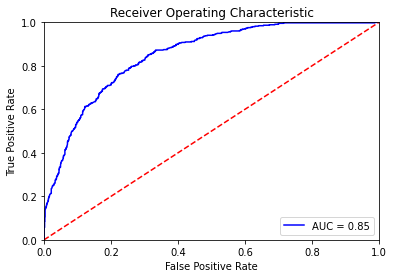

In [35]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()